In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize

from luwiji.recommendation_system import illustration

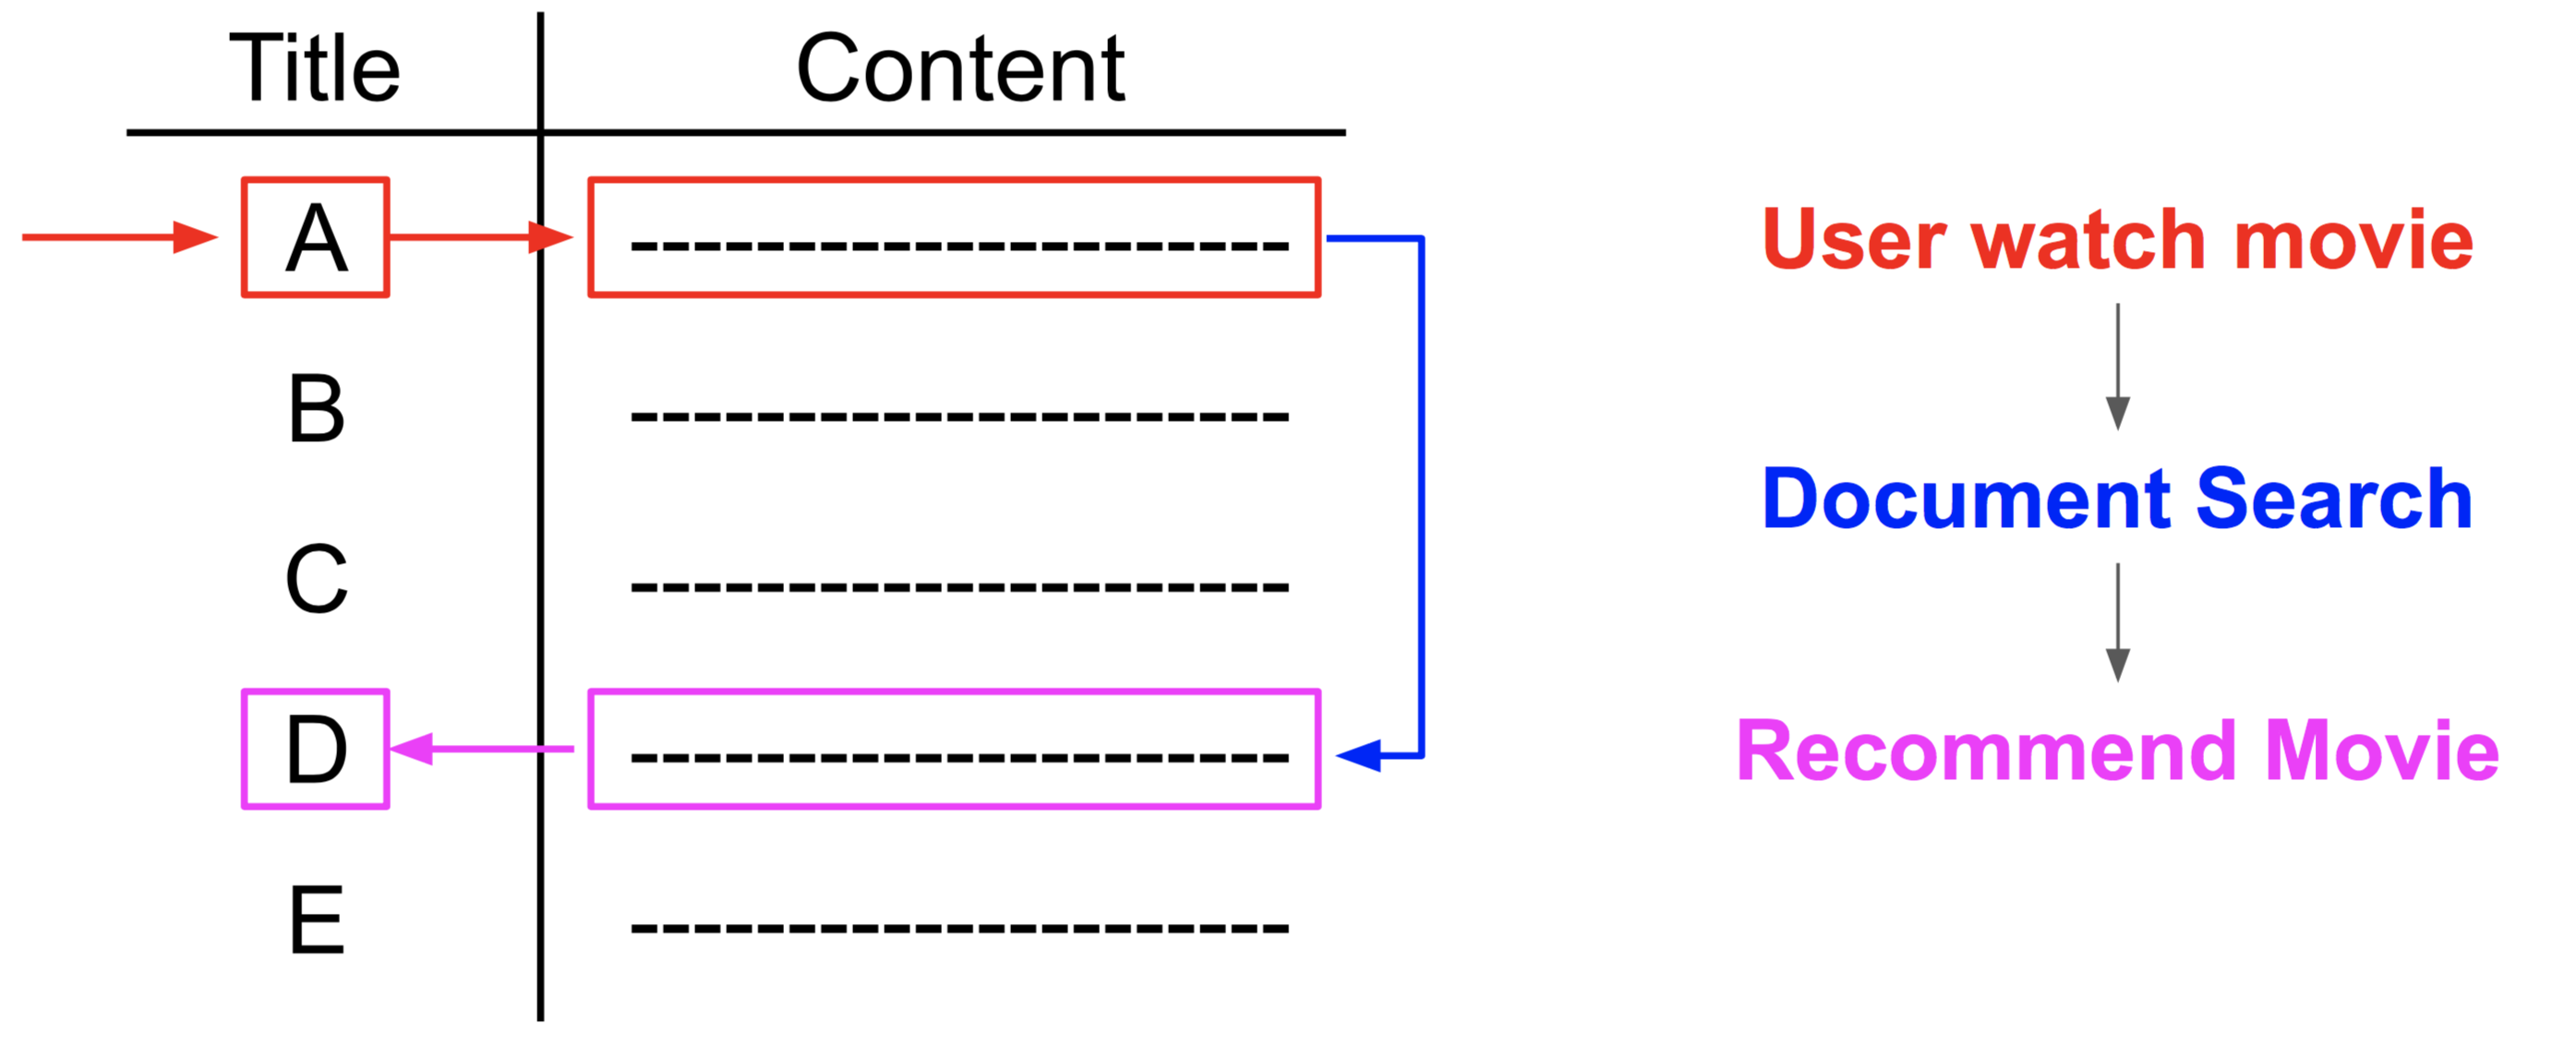

In [4]:
illustration.content_based

# Content = Sinopsis Film

In [5]:
df = pd.read_csv("data/content_by_synopsis.csv")
df.head()

,title,overview
0,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,Father of the Bride Part II,Just when George Banks has recovered from his ...


## Encode to create bank

In [7]:
bow = CountVectorizer(stop_words="english", tokenizer=word_tokenize)
bank = bow.fit_transform(df.overview)

## Step 1: Encode what user watch

In [8]:
idx = 0

In [10]:
content = df.loc[idx, "overview"]

In [12]:
code = bow.transform([content])

In [13]:
code

<1x86708 sparse matrix of type '<class 'numpy.int64'>'
	with 28 stored elements in Compressed Sparse Row format>

## Step 2: Document search

In [14]:
from sklearn.metrics.pairwise import cosine_distances

In [15]:
sim = cosine_distances(code, bank)
sim

array([[0.        , 0.68698928, 0.70198022, ..., 0.88529213, 0.68931574,
        0.75277431]])

In [16]:
rec_idx = sim.argsort()[0, 1:11]
rec_idx

array([14706,  2945,  9984, 36827, 40606, 13404, 22084, 14078,  6172,
       27006])

## Step 3: Recommend

In [18]:
df.loc[rec_idx]

,title,overview
14706,Toy Story 3,"Woody, Buzz, and the rest of Andy's toys haven..."
2945,Toy Story 2,"Andy heads off to Cowboy Camp, leaving his toy..."
9984,The 40 Year Old Virgin,Andy Stitzer has a pleasant life with a nice a...
36827,Wabash Avenue,Andy Clark discovers he was cheated out of a h...
40606,Stasis,After a night out of partying and left behind ...
13404,The Gang's All Here,"Playboy Andy Mason, on leave from the army, ro..."
22084,The Pied Piper,"Greed, corruption, ignorance, and disease. Mid..."
14078,A Matter of Dignity,"During one of her parents many parties, Chloe ..."
6172,The Courtship of Eddie's Father,The film that started the classic TV series. A...
27006,Superdome,"It's Superbowl. And there's a lot of drama, on..."


# Content = Multiple information = Metadata soup

In [19]:
df = pd.read_csv("data/content_by_multiple.csv")
df.head()

,title,genres,cast,keywords,director,metadata
0,Toy Story,animation comedy family,tom_hanks tim_allen don_rickles,jealousy toy boy,john_lasseter,animation comedy family tom_hanks tim_allen do...
1,Jumanji,adventure fantasy family,robin_williams jonathan_hyde kirsten_dunst,board_game disappearance based_on_children's_book,joe_johnston,adventure fantasy family robin_williams jonath...
2,Grumpier Old Men,romance comedy,walter_matthau jack_lemmon ann-margret,fishing best_friend duringcreditsstinger,howard_deutch,romance comedy walter_matthau jack_lemmon ann-...
3,Waiting to Exhale,comedy drama romance,whitney_houston angela_bassett loretta_devine,based_on_novel interracial_relationship single...,forest_whitaker,comedy drama romance whitney_houston angela_ba...
4,Father of the Bride Part II,comedy,steve_martin diane_keaton martin_short,baby midlife_crisis confidence,charles_shyer,comedy steve_martin diane_keaton martin_short ...


## Encode to create bank

In [21]:
bow = CountVectorizer(stop_words="english", tokenizer=word_tokenize)
bank = bow.fit_transform(df.metadata)

## Step 1: Encode what user watch

In [22]:
idx = 0

In [23]:
content = df.loc[idx, "metadata"]

In [24]:
code = bow.transform([content])

In [25]:
code

<1x69375 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

## Step 2: Document search

In [26]:
from sklearn.metrics.pairwise import cosine_distances

In [27]:
sim = cosine_distances(code, bank)
sim

array([[1.11022302e-16, 9.00000000e-01, 8.94590745e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [28]:
rec_idx = sim.argsort()[0, 1:11]
rec_idx

array([ 2963, 14771, 24390,  3273, 25917, 41974, 34722, 25857, 29030,
       37061])

## Step 3: Recommend

In [30]:
df.loc[rec_idx]

,title,genres,cast,keywords,director,metadata
2963,Toy Story 2,animation comedy family,tom_hanks tim_allen joan_cusack,museum prosecution identity_crisis,john_lasseter,animation comedy family tom_hanks tim_allen jo...
14771,Toy Story 3,animation family comedy,tom_hanks tim_allen ned_beatty,hostage college toy,lee_unkrich,animation family comedy tom_hanks tim_allen ne...
24390,The Legend of Mor'du,animation family,tom_hanks tim_allen joan_cusack,toy short toy_story,steve_purcell,animation family tom_hanks tim_allen joan_cusa...
3273,Creature Comforts,animation comedy family,NaN,animation,nick_park,animation comedy family animation nick_park
25917,A Flintstones Christmas Carol,animation comedy family,NaN,NaN,rein_raamat,animation comedy family rein_raamat
41974,Banana,animation comedy family,NaN,NaN,adam_foulkes,animation comedy family adam_foulkes
34722,Open Season: Scared Silly,animation comedy family,NaN,NaN,dee_hibbert-jones,animation comedy family dee_hibbert-jones
25857,"I Want a Dog for Christmas, Charlie Brown",animation comedy family,NaN,NaN,dony_permedi,animation comedy family dony_permedi
29030,Tom and Jerry: Shiver Me Whiskers,animation comedy family,pablo_francisco,NaN,NaN,animation comedy family pablo_francisco
37061,VeggieTales: The Ultimate Silly Song Countdown,animation family,NaN,NaN,NaN,animation family


# Experiment?

- metadata yang berbeda: producer_company, tambahkan synopsis
- distance yang berbeda: euclidean
- encoder yang berbeda: tfidf
- Memberikan bobot pada informasi tertentu